## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Loading the sklearn's wines dataset

In [2]:
data = pd.read_csv("./data/song_db.csv", sep=";", error_bad_lines=False)

C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3335: expected 20 fields, saw 21\nSkipping line 3336: expected 20 fields, saw 21\nSkipping line 3343: expected 20 fields, saw 21\nSkipping line 3345: expected 20 fields, saw 21\nSkipping line 3350: expected 20 fields, saw 21\nSkipping line 4630: expected 20 fields, saw 22\nSkipping line 4632: expected 20 fields, saw 22\nSkipping line 4634: expected 20 fields, saw 22\nSkipping line 4643: expected 20 fields, saw 22\nSkipping line 4644: expected 20 fields, saw 22\nSkipping line 4645: expected 20 fields, saw 22\nSkipping line 4646: expected 20 fields, saw 22\nSkipping line 4647: expected 20 fields, saw 22\nSkipping line 4650: expected 20 fields, saw 22\nSkipping line 4651: expected 20 fields, saw 22\nSkipping line 4655:

In [6]:
# data = datasets.load_wine()

# Let's see what we have.
#display(data)
# OMG! Another dictionary!!!

# We will not use the 'target' key as we don't want to classify the wines in types.
# we just want to cluster them.
# X = pd.DataFrame(data["data"], columns=data["feature_names"])

print()
data.head()
X = data.copy()

X.drop(['id', 'name', 'album', 'artist', 'release_date','mode','type', 'time_signature'], axis=1, inplace=True)

In [7]:
X.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo
0,168489,85,0.792,0.12400,0.511,0.000090,0.1400,-6.876,0.0409,0.1110,2,113.983
1,169319,74,0.797,0.00538,0.516,0.438000,0.0728,-6.286,0.0832,0.0478,1,109.993
2,145078,81,0.753,0.32600,0.680,0.000041,0.4230,-7.092,0.0349,0.1920,5,105.977
3,118073,67,0.794,0.03880,0.535,0.000010,0.5550,-5.698,0.0506,0.0487,0,120.067
4,126850,78,0.715,0.55300,0.633,0.000004,0.0905,-6.869,0.0804,0.3190,2,105.945


In [3]:
data['DESCR']

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [4]:
data['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Scaling features

In [8]:
X.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo
count,4.731400e+04,47314.000000,47314.000000,47314.000000,47314.000000,47314.000000,47314.000000,47314.000000,47314.000000,47314.000000,47314.000000,47314.000000
mean,2.349212e+05,36.441835,0.584047,0.314799,0.605859,0.130753,0.191500,-8.608288,0.089286,0.482517,5.272985,119.735488
std,1.177745e+05,21.622640,0.170061,0.325091,0.242187,0.282133,0.163635,5.023171,0.109256,0.249274,3.600563,28.839383
min,6.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-45.137000,0.000000,0.000000,0.000000,0.000000
25%,1.851460e+05,20.000000,0.473000,0.030900,0.442000,0.000000,0.095400,-10.427000,0.034900,0.280000,2.000000,97.447250
50%,2.180260e+05,37.000000,0.599000,0.179000,0.645000,0.000049,0.124000,-7.294500,0.047200,0.477000,5.000000,119.985000
75%,2.619738e+05,53.000000,0.710000,0.571000,0.802000,0.024100,0.234000,-5.303000,0.088400,0.680000,8.000000,136.526000
max,4.581482e+06,100.000000,0.982000,0.996000,1.000000,1.000000,1.000000,1.183000,0.967000,0.995000,11.000000,220.098000


In [25]:
round(len(X)/4,0)

11828.0

In [26]:

X_sample = X.sample(int(round(len(X)/4,0)))

The scale of "proline" is much bigger than the scale of many other variable!

**K-Means is a distance based algorithm**: we need to scale / normalize!:

In [27]:
scaler = StandardScaler()
scaler.fit(X_sample)
X_scaled = scaler.transform(X_sample)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_sample.columns)
display(X_sample.head())
print()
display(X_scaled_df.head())

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo,cluster
32329,229080,1,0.663,0.016600,0.748,0.0468,0.4170,-10.390,0.0319,0.850,0,97.786,5
6574,338076,24,0.802,0.031300,0.671,0.0000,0.0455,-6.455,0.0624,0.673,1,93.950,5
15804,170396,16,0.358,0.777000,0.442,0.0000,0.0720,-8.096,0.0529,0.591,9,83.538,2
23440,431847,0,0.790,0.000239,0.872,0.7670,0.0977,-10.922,0.0574,0.618,7,126.009,6
23618,164000,88,0.798,0.414000,0.620,0.0192,0.1120,-7.079,0.2320,0.235,8,120.031,0


,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo,cluster
0,-0.037740,-1.662972,0.454749,-0.922642,0.593128,-0.291623,1.379562,-0.361110,-0.519738,1.458002,-1.486549,-0.760913,0.450249
1,0.927831,-0.594697,1.274341,-0.877229,0.273599,-0.459647,-0.896428,0.428319,-0.246373,0.750107,-1.208831,-0.893289,0.450249
2,-0.557608,-0.966271,-1.343638,1.426444,-0.676689,-0.459647,-0.734076,0.099106,-0.331520,0.422156,1.012916,-1.252597,-0.814025
3,1.758527,-1.709418,1.203585,-0.973185,1.107694,2.294083,-0.576625,-0.467838,-0.291187,0.530140,0.457479,0.213033,0.871673
4,-0.614269,2.377893,1.250756,0.305037,0.061963,-0.390714,-0.489017,0.303134,1.273714,-1.001632,0.735198,0.006739,-1.656873


In [28]:
X_scaled_df.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo,cluster
count,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04
mean,-1.225300e-16,3.671958e-16,3.316308e-16,-5.442380e-17,3.021293e-16,3.643658e-16,-5.194432e-17,-2.344487e-16,7.342274e-17,1.853904e-16,-2.501663e-16,2.923487e-16,1.491123e-16
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.794381e+00,-1.709418e+00,-3.454532e+00,-9.739236e-01,-2.510869e+00,-4.596470e-01,-1.175183e+00,-7.078575e+00,-8.056508e-01,-1.941493e+00,-1.486549e+00,-4.135406e+00,-1.656873e+00
25%,-4.303830e-01,-7.340372e-01,-6.537653e-01,-8.766115e-01,-6.725391e-01,-4.596470e-01,-5.937796e-01,-3.633664e-01,-4.937461e-01,-8.176598e-01,-9.311127e-01,-7.850175e-01,-8.140245e-01
50%,-1.412106e-01,9.110280e-03,8.917488e-02,-4.116754e-01,1.574066e-01,-4.594623e-01,-4.154989e-01,2.603022e-01,-3.830558e-01,-1.777876e-02,-9.795749e-02,4.978833e-03,2.882417e-02
75%,2.489940e-01,7.522578e-01,7.377735e-01,7.900529e-01,8.047642e-01,-3.712369e-01,2.783257e-01,6.568221e-01,-1.580595e-02,8.020993e-01,1.012916e+00,6.150196e-01,8.716729e-01
max,3.851920e+01,2.749467e+00,2.312099e+00,2.102995e+00,1.638860e+00,3.130614e+00,4.896165e+00,1.953612e+00,7.825505e+00,2.021918e+00,1.568353e+00,3.456461e+00,1.293097e+00


Now, all features will have the same weight.

## Clustering the wines with K-Means

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters should we have.

When randomness is involved (remember, **K-means picks randomly the initial centroids**), we better use a random seed so that we can reproduce our results. We can set this directly to the argument **random_state**.

In [29]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [30]:
kmeans.labels_

array([0, 0, 2, ..., 4, 0, 2])

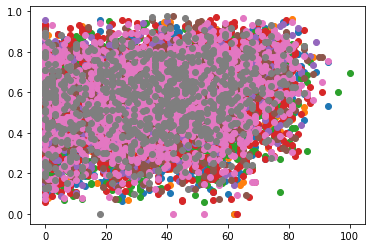

In [31]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [32]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    2248
1     639
2    2106
3    2698
4     741
5     923
6    1746
7     727
dtype: int64

Now let's see to which group was assigned every wine.

In [33]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

ValueError: Length of values (11828) does not match length of index (47314)

In [16]:
X[X['cluster'] == 2].sample()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo,cluster
19552,251080,18,0.566,0.511,0.419,0.00017,0.0875,-9.853,0.0262,0.181,0,101.823,2


## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [17]:
kmeans.inertia_

328042.92032093974

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [18]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

196164.19473912515


## Chosing K

We have used K=8 by default for now - but we know that 8 might not be the optimal number of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

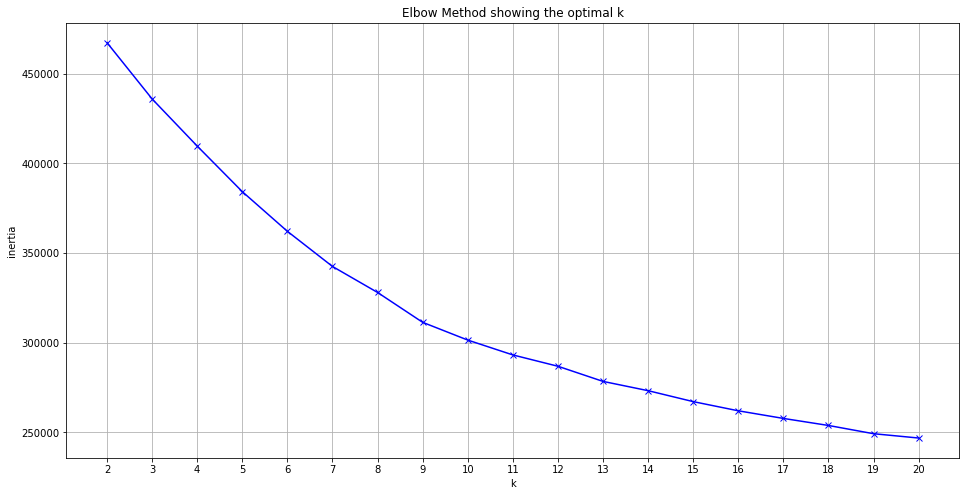

In [19]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid()
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

## Silouhette

There's a metric called **Silhouette Score** that also measures how similar is an observation is to its own cluster compared to other clusters. For the ith observation, the **Silhouette Score** is:

$$s_{K,L} = (b - a) / max(a,b) $$

Where:

a = mean intra-cluster distance (the average distance between i and every other observation in the cluster where i belongs)

$$ a = \frac{1}{n_{K}}\sum_{i,j\neq{i}}^{n_{K}}d(i,j)$$

b = mean **nearest-cluster** distance (the average distance between i and the observations of the nearest cluster that i is not part of it)

$$ b = \frac{1}{(n_{K}*n_{L})}\sum_{i}^{n_{K}}\sum_{j}^{n_{L}}d(i,j)$$

The silhouette score for the whole model is the **average of all the silhouette scores** of each instance.

$$ S = \frac{2}{N(N-1)}\sum_{c}s_{K,L}$$

Because we divide the substraction of (b-a) by the max of the two distances (which will always be b unless the observation has been wrongly assigned to a cluster it should not belong), we obtain a "normalized score", that ranges from -1 to 1, and that makes it easier to interpret.

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

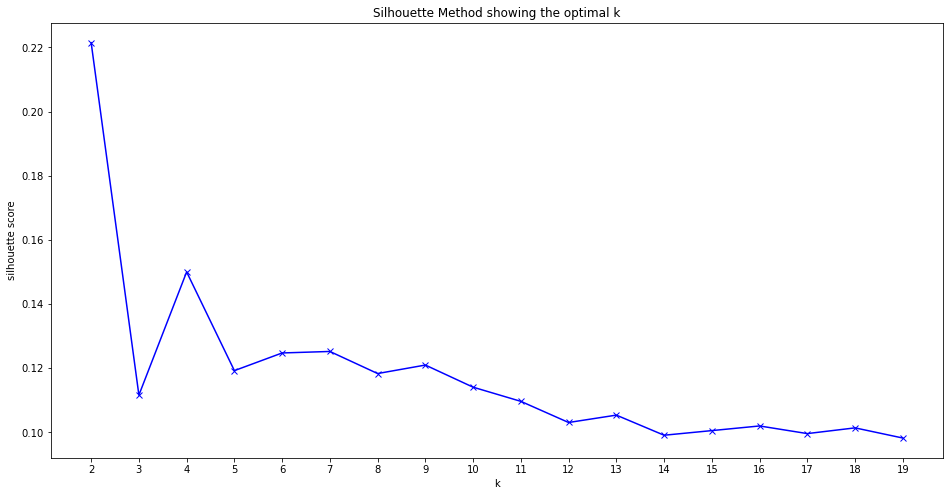

In [20]:
import pickle

K = range(2, 20)
silhouette = []

for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

<b> advanced (optional)

In [19]:
##conda install -c districtdatalabs yellowbrick

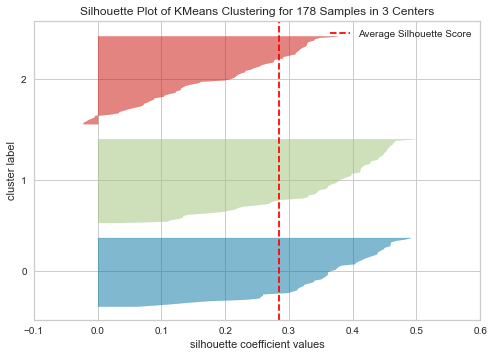

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.

# Saving with pickle

In [26]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

# with open("Model/scaler.pickle", "wb") as f:
#     pickle.dump(scaler,f)

# with open("Model/kmeans_4.pickle", "wb") as f:
#     pickle.dump(kmeans,f)
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

FileNotFoundError: [Errno 2] No such file or directory: 'Model/scaler.pickle'

In [22]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [23]:
scaler2 = load("Model/scaler.pickle")

StandardScaler()

In [24]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song 

# Time to work!

Time to clusterize the songs in your database and see how they look like. 